__Return your attention to the cats data frame in package MASS. In the
first few problems in Exercise 21.1, you fitted the main-effect-only
model to predict the heart weights of domestic cats by total body
weight and sex.__ <br>
__a.__ Fit the model again, and this time include an interaction
between the two predictors. Inspect the model summary.
What do you notice in terms of the parameter estimates and
their significance when compared to the earlier main-effect-only
version?

In [1]:
library(MASS)
names(cats)

[1] "Sex" "Bwt" "Hwt"

In [11]:
cat.MLR = lm(Hwt ~ Bwt + Sex + Bwt:Sex, data = cats)
summary(cat.MLR)


Call:
lm(formula = Hwt ~ Bwt + Sex + Bwt:Sex, data = cats)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7728 -1.0118 -0.1196  0.9272  4.8646 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9813     1.8428   1.618 0.107960    
Bwt           2.6364     0.7759   3.398 0.000885 ***
SexM         -4.1654     2.0618  -2.020 0.045258 *  
Bwt:SexM      1.6763     0.8373   2.002 0.047225 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.442 on 140 degrees of freedom
Multiple R-squared:  0.6566,	Adjusted R-squared:  0.6493 
F-statistic: 89.24 on 3 and 140 DF,  p-value: < 2.2e-16


__b.__ Produce a scatterplot of heart weight on body weight, using
different point characters or colors to distinguish the observations according to sex. Use abline to add two lines denoting
the fitted model. How does this plot differ from the one in
Exercise 21.1 (d)

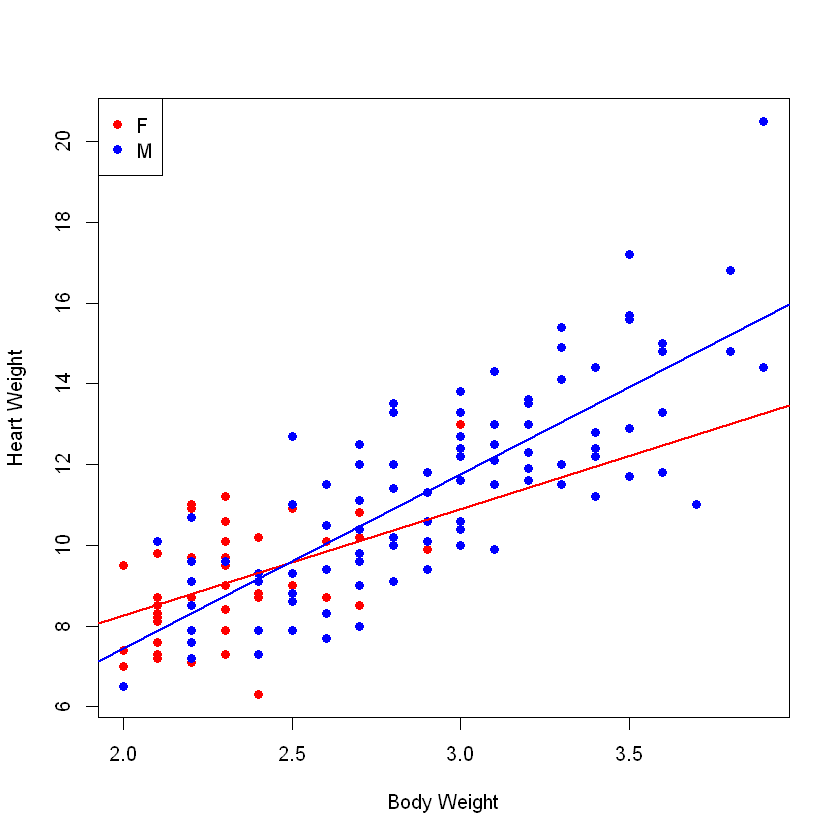

In [23]:
cat.coeff = coef(cat.MLR)

cat.female = c(cat.coeff[1], cat.coeff[2])
cat.male = c(cat.coeff[1] + cat.coeff[3], cat.coeff[2] + cat.coeff[4])


plot(cats$Hwt ~ cats$Bwt, col = c("red", "blue")[as.numeric(cats$Sex)], pch = 16, xlab = "Body Weight",  ylab = "Heart Weight")
abline(cat.female, lwd = 2, col = "red")
abline(cat.male, lwd = 2, col = "blue")

legend("topleft", legend = levels(cats$Sex), col =  c("red", "blue"), pch = 16)


__c.__ Predict the heart weight of Tilman’s cat using the new model
(remember that Sigma is a 3.4 kg female) accompanied by a
95 percent prediction interval. Compare it to the main-effectsonly model from the earlier exercise.

In [25]:
predict(cat.MLR, newdata = data.frame(Bwt = 3.4, Sex = "F"), data = cats, interval = "prediction", level = 0.95)


,fit,lwr,upr
1,11.94512,8.651786,15.23845


__In Exercise 21.2, you accessed the trees data frame in the contributed
faraway package. After loading the package, access the ?trees help
file; you’ll find the volume and girth measurements you used earlier,
as well as data on the height of each tree.__ <br>
__d.__ Without using any transformations of the data, fit and inspect a
main-effects-only model for predicting volume from girth and
height. Then, fit and inspect a second version of this model
including an interaction.

In [33]:
trees.MLR = lm(Volume ~ Girth + Height, data = trees)
summary(trees.MLR)


Call:
lm(formula = Volume ~ Girth + Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


In [30]:
head(trees)

Girth,Height,Volume
8.3,70,10.3
8.6,65,10.3
8.8,63,10.2
10.5,72,16.4
10.7,81,18.8
10.8,83,19.7


In [34]:
trees.MLR2 = lm(Volume ~ Girth * Height, data = trees)
summary(trees.MLR2)


Call:
lm(formula = Volume ~ Girth * Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5821 -1.0673  0.3026  1.5641  4.6649 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.39632   23.83575   2.911  0.00713 ** 
Girth        -5.85585    1.92134  -3.048  0.00511 ** 
Height       -1.29708    0.30984  -4.186  0.00027 ***
Girth:Height  0.13465    0.02438   5.524 7.48e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.709 on 27 degrees of freedom
Multiple R-squared:  0.9756,	Adjusted R-squared:  0.9728 
F-statistic: 359.3 on 3 and 27 DF,  p-value: < 2.2e-16


__e.__ Repeat (d), but this time use the log transformation of all variables. What do you notice about the significance of the interaction between the untransformed and transformed models? What
does this suggest about the relationships in the data?

In [35]:
trees.MLR.log = lm(log(Volume) ~ log(Girth) + log(Height), data = trees)
summary(trees.MLR.log)


Call:
lm(formula = log(Volume) ~ log(Girth) + log(Height), data = trees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.168561 -0.048488  0.002431  0.063637  0.129223 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.63162    0.79979  -8.292 5.06e-09 ***
log(Girth)   1.98265    0.07501  26.432  < 2e-16 ***
log(Height)  1.11712    0.20444   5.464 7.81e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08139 on 28 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.9761 
F-statistic: 613.2 on 2 and 28 DF,  p-value: < 2.2e-16


In [36]:
trees.MLR.log2 = lm(log(Volume) ~ log(Girth) * log(Height), data = trees)
summary(trees.MLR.log2)


Call:
lm(formula = log(Volume) ~ log(Girth) * log(Height), data = trees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.165941 -0.048613  0.006384  0.062204  0.132295 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)             -3.6869     7.6996  -0.479    0.636
log(Girth)               0.7942     3.0910   0.257    0.799
log(Height)              0.4377     1.7788   0.246    0.808
log(Girth):log(Height)   0.2740     0.7124   0.385    0.704

Residual standard error: 0.08265 on 27 degrees of freedom
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.9753 
F-statistic: 396.4 on 3 and 27 DF,  p-value: < 2.2e-16
